In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from statsmodels.formula.api import ols


# 전체 컬럼, 전체 행, 전체 숫자 출력

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

# warning message 제거

import warnings
warnings.filterwarnings('ignore')

# plot 출력

%matplotlib inline

# plot 한글출력

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
films = pd.read_csv('../01.Data_Collection/films_updated.csv')

In [3]:
films.head()

,영화명,영화코드,개봉일,F-rated,장르,등급,영화구분,영화형태,대표국적,국적,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
0,워킹걸,20147947,2015-01-07,1,"코미디,멜로/로맨스",청소년관람불가,일반영화,장편,한국,한국,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,7077,308,1183887479.000000,149181,389163479,49874,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,정범식,10061758.000000,남자,-,-,-,-,-,-,-,-,-,정범식,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",조여정,백보희,10066680,여자,배우,기생충|워킹걸|인간중독|표적|후궁 : 제왕의 첩|방자전|흡혈형사 나도열
1,설해,20124398,2015-01-08,0,"멜로/로맨스,드라마",12세이상관람가,독립/예술영화,장편,한국,한국,(주)맑음영화사,"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",335,34,20767500.000000,2796,10191000,1317,김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,김정권,10005546.000000,남자,-,-,-,-,-,-,-,-,-,"김정권, 김군영",김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재...",박해진,상우,20126329,남자,배우,치즈인더트랩|설해|젓가락
2,허삼관,20131262,2015-01-14,0,드라마,12세이상관람가,일반영화,장편,한국,한국,"(주)두타연,(주)판타지오픽쳐스",(주)넥스트엔터테인먼트월드(NEW),27661,621,7405415569.000000,955175,1879461269,232983,하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,하정우,10087253.000000,남자,-,-,-,-,-,-,-,-,-,"하정우, 김주호",하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균...",하정우,허삼관,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...
3,오늘의 연애,20142407,2015-01-14,0,"멜로/로맨스,코미디",15세이상관람가,일반영화,장편,한국,한국,(주)팝콘에프앤엠,씨제이이앤엠(주),47237,709,14924654487.000000,1891993,3951958987,480061,박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,박진표,10029363.000000,남자,-,-,-,-,-,-,-,-,-,"박진표, 이병헌",박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"이승기,문채원,이서진,장진우,이경진,이동진,임하룡,이상협,김광규,김부선,가인,임종윤...",이승기,준수,10056227,남자,배우,궁합|오늘의 연애
4,고양이 장례식,20144601,2015-01-15,0,멜로/로맨스,12세이상관람가,독립/예술영화,장편,한국,한국,영화 고양이 장례식 제작 조합,(주)인디플러그,394,46,23200900.000000,2865,17496200,2146,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,이종훈,10057421.000000,남자,-,-,-,-,-,-,-,-,-,이종훈,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,"강인,박세영,정겨운,강신유,신무호,김민지,이민희,남기준,민지,김병춘,김도영,차민지",강인,NaN,10005001,남자,배우,고양이 장례식|순정만화|앨빈과 슈퍼밴드|꽃미남 연쇄 테러 사건


In [93]:
# 감독 성별: 남자
m=films[films['감독성별']== '남자']

In [106]:
m

,영화명,영화코드,개봉일,F-rated,장르,등급,영화구분,영화형태,대표국적,국적,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
0,워킹걸,20147947,2015-01-07,1,"코미디,멜로/로맨스",청소년관람불가,일반영화,장편,한국,한국,"(주)홍필름,(주)수필름",메가박스중앙(주)플러스엠,7077,308,1183887479.000000,149181,389163479,49874,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,정범식,10061758.000000,남자,-,-,-,-,-,-,-,-,-,정범식,정범식,정범식,10061758,남자,감독,공포체험단 곤지암편|천문: 하늘에 묻는다|곤지암|워킹걸|미쓰GO|외톨이|기담|무서운...,"조여정,클라라,김태우,배유람,정범식,정범식,박주희,백경인,조은영,손진우,배성우,유찬...",조여정,백보희,10066680,여자,배우,기생충|워킹걸|인간중독|표적|후궁 : 제왕의 첩|방자전|흡혈형사 나도열
1,설해,20124398,2015-01-08,0,"멜로/로맨스,드라마",12세이상관람가,독립/예술영화,장편,한국,한국,(주)맑음영화사,"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",335,34,20767500.000000,2796,10191000,1317,김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,김정권,10005546.000000,남자,-,-,-,-,-,-,-,-,-,"김정권, 김군영",김정권,김정권,10005546,남자,감독,설해|그 남자의 책 198쪽|바보|화성으로 간 사나이|동감|귀소,"박해진,이영아,송재희,전무송,최원주,이상민,이기열,윤기호,김수환,김정권,김혜진,박재...",박해진,상우,20126329,남자,배우,치즈인더트랩|설해|젓가락
2,허삼관,20131262,2015-01-14,0,드라마,12세이상관람가,일반영화,장편,한국,한국,"(주)두타연,(주)판타지오픽쳐스",(주)넥스트엔터테인먼트월드(NEW),27661,621,7405415569.000000,955175,1879461269,232983,하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,하정우,10087253.000000,남자,-,-,-,-,-,-,-,-,-,"하정우, 김주호",하정우,하정우,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,"하정우,하지원,전혜진,장광,주진모,성동일,이경영,김영애,정만식,조진웅,김기천,김성균...",하정우,허삼관,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...
3,오늘의 연애,20142407,2015-01-14,0,"멜로/로맨스,코미디",15세이상관람가,일반영화,장편,한국,한국,(주)팝콘에프앤엠,씨제이이앤엠(주),47237,709,14924654487.000000,1891993,3951958987,480061,박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,박진표,10029363.000000,남자,-,-,-,-,-,-,-,-,-,"박진표, 이병헌",박진표,박진표,10029363,남자,감독,오늘의 연애|공범|내 사랑 내 곁에|그놈 목소리|너는 내 운명|죽어도 좋아|신비한 ...,"이승기,문채원,이서진,장진우,이경진,이동진,임하룡,이상협,김광규,김부선,가인,임종윤...",이승기,준수,10056227,남자,배우,궁합|오늘의 연애
4,고양이 장례식,20144601,2015-01-15,0,멜로/로맨스,12세이상관람가,독립/예술영화,장편,한국,한국,영화 고양이 장례식 제작 조합,(주)인디플러그,394,46,23200900.000000,2865,17496200,2146,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,이종훈,10057421.000000,남자,-,-,-,-,-,-,-,-,-,이종훈,이종훈,이종훈,10057421,남자,감독,고양이 장례식|심판의날,"강인,박세영,정겨운,강신유,신무호,김민지,이민희,남기준,민지,김병춘,김도영,차민지",강인,NaN,10005001,남자,배우,고양이 장례식|순정만화|앨빈과 슈퍼밴드|꽃미남 연쇄 테러 사건
5,미라클 여행기,20148631,2015-01-15,1,다큐멘터리,전체관람가,독립/예술영화,장편,한국,한국,"미라클필름,(주)꿈길제작소,허철필름",미라클필름,320,12,20562500.000000,3228,13008500,2117,허철,허철,20114576,남자,감독,돌아온다|필름시대사랑|미라클 여행기|영화판,허철,20114576.000000,남자,-,-,-,-,-,-,-,-,-,허철,허철,허철,20114576,남자,감독,돌아온다|필름시대사랑|미라클 여행기|영화판,"최미라,김영민,김정민",최미라,NaN,20188866,여자,배우,미라클 여행기|찌라시: 위험한 소문|신세기 낭만시대
6,강남 1970,20136888,2015-01-21,0,"액션,드라마",청소년관람불가,일반영화,장편,한국,한국,"(주)모베라픽처스,(주)쇼박스",(주)쇼박스,53304,841,17717971499.000000,2192172,4859661899,586992,유하,유하,20111250,남자,감독,파이프라인|강남 1970|강남1970(무삭제판)|하울링|쌍화점|비열한 거리|말죽거리...,유하,20111250.000000,남자,-,-,-,-,-,-,-,-,-,유하,유하,유하,20111250,남자,감독,파이프라인|강남 1970|강남1970(무삭제판)|하울링|쌍화점|비열한 거리|말죽거리...,"이민호,김래원,정진영,설현,유승목,한재영,이연두,정호빈,최진호,엄효섭,최병모,지대한...",이민호,종대,20185376,남자,배우,바운티 헌터스: 현상금사냥꾼|강남 1970|강남1970(무삭제판)|울학교 이티|강철...
8,내 심장을 쏴라,20148553,2015-01-28,1,드라마,15세이상관람가,일반영화,장편,한국,한국,(주)주피터필름,"(주)리틀빅픽쳐스,(주)이수C&E",20042,452,2856859132.000000,387409,602511932,79237,문제용,문제용,10026804,남자,감독,내 심장을 쏴라|아부의 왕|슈퍼맨이었던 사나이|타짜|내 생애 가장 아름다운 일주일|...,문제용,10026804.000000,남자,-,-,-,-,-,-,-,-,-,"최정미, 문제용, 유선동",최정미,최정미,20209326,여자,시나리오(각본),"고산자, 대동여지도|따라지 : 비열한 거리|내 심장을 쏴라","이민기,여진구,유오성,김정태,김기천,신구,송영창,박충선,박두식,한혜린,이준혁,임문영...",이민기,류승민,10055447,남자,배우,조선명탐정: 흡혈괴마의 비밀|내 심장을 쏴라|황제를 위하여|몬스터|연애의 온도|오싹...
9,어우동: 주인 없는 꽃,20149298,2015-01-29,0,멜로/로맨스,청소년관람불가,일반영화,장편,한국,한국,"(유)조이앤컨텐츠그룹,㈜리필름",(주)드림팩트엔터테인먼트,393,18,60141000.000000,12203,18432000,3018,이수성,이수성,10056145,남자,감독,로드킬|대가리|독고다이|일진 3|일진 2|메모리즈|일진|미스터 좀비(감독판)|휴가|...,이수성,10056145.000000,남자,-,-,-,-,-,-,-,-,-,이창규,이창규,이창규,20110319,남자,감독,어우동: 주인 없는 꽃|하쿠나 마타타 - 지라니 이야기,"백도빈,송은채,여욱환,남경읍,이종민,이탁건,임준혁,장현희,정서경,박종환,정지나,조경...",백도빈,이동,10030280,남자,배우,시간위의 집|

In [94]:
# 남감독 f2
m_f2=m[m['F-rated']==2]

In [95]:
m_f1=m[m['F-rated']==1]

In [96]:
# 감독 성별: 여자
w=films[films['감독성별']== '여자']

In [97]:
# 감독 f2
w_f2=w[w['F-rated']==2]

In [98]:
# 감독 f2
w_f1=w[w['F-rated']==1]

In [102]:
labels = films['감독성별'].value_counts().index
values = films['감독성별'].value_counts().values

fig = go.Figure(data=[go.Pie(labels=labels,text=values, values=values, title='감독 성별 비교')])
fig.show()

In [103]:
labels = w['F-rated'].value_counts().index
values = w['F-rated'].value_counts().values

fig = go.Figure(data=[go.Pie(labels=labels,text=values, values=values, title='여자감독 F-rated')])
fig.show()

In [104]:
labels = m['F-rated'].value_counts().index
values = m['F-rated'].value_counts().values


fig = go.Figure(data=[go.Pie(labels=labels,text=values, values=values, title='남자감독 F-rated')])
fig.show()

# 상영별 시간대

In [105]:
film = pd.read_csv('../01.Data_Collection/films_final.csv')
screen = pd.read_csv('../01.Data_Collection/screens_final.csv')
show = pd.read_csv('../01.Data_Collection/Theaters_merged_files/show_timetable.csv')

In [49]:
seats_count = screen.groupby('영화명')['좌석수'].sum().reset_index()
seats_count

,영화명,좌석수
0,0.0MHz,684373
1,1919 유관순,413427
2,1987,22964767
3,"1991, 봄",80315
4,1급기밀,1461685
5,22,42529
6,4등,552334
7,5.18 힌츠페터 스토리,186578
8,7년-그들이 없는 언론,200386
9,7년의 밤,4053982


In [50]:
film = film.merge(seats_count, how='left', on='영화명')

In [51]:
film = film.rename(columns={'좌석수':'배정좌석수합계'})

In [52]:
time_count = show.groupby(['영화명', '상영시간대'])['좌석수'].sum().reset_index()

In [53]:
time_count = time_count.rename(columns={'좌석수':'배정좌석수'})

In [54]:
seats = time_count.groupby('영화명')['배정좌석수'].sum().reset_index().rename(columns={'배정좌석수':'전체배정좌석수'})

In [55]:
time_count = time_count.merge(seats, how='left', on='영화명')

In [56]:
time_count['시간대별상영비율'] = time_count['배정좌석수'] / time_count['전체배정좌석수']

In [57]:
time_count['상영시간대'].value_counts()

브런치      661
프라임2     661
프라임1     661
데이라이트    659
모닝       650
문라이트     625
나이트      612
Name: 상영시간대, dtype: int64

In [58]:
time_count.groupby('영화명')['상영시간대'].count().reset_index().sort_values('상영시간대')

,영화명,상영시간대
43,공포체험단 곤지암편,3
348,서태지밴드 콘서트투어 '콰이어트나이트',4
235,명령불복종 교사,4
240,무서운 집,4
51,국경의 왕,4
422,안나 카레니나,4
175,독도의 영웅들,5
628,하프,5
383,슈퍼레이서 엔지,5
611,파파 오랑후탄,5


In [59]:
time_count[time_count['영화명']=='공포체험단 곤지암편'].set_index('상영시간대').T

상영시간대,나이트,문라이트,프라임2
영화명,공포체험단 곤지암편,공포체험단 곤지암편,공포체험단 곤지암편
배정좌석수,507.000000,32968.000000,2088.000000
전체배정좌석수,35563.000000,35563.000000,35563.000000
시간대별상영비율,0.014256,0.927031,0.058713


In [66]:
time_list = ['모닝', '브런치', '데이라이트', '프라임1', '프라임2', '나이트', '문라이트']
time_list

['모닝', '브런치', '데이라이트', '프라임1', '프라임2', '나이트', '문라이트']

In [64]:
seat_by_time_rate = pd.DataFrame(columns=['영화명', '모닝', '브런치', '데이라이트', '프라임1', '프라임2', '나이트', '문라이트'])
seat_by_time_rate

,영화명,모닝,브런치,데이라이트,프라임1,프라임2,나이트,문라이트


In [69]:
film_list = time_count['영화명'].unique()

In [62]:
df = time_count[time_count['영화명']=='0.0MHz'].drop(['배정좌석수', '전체배정좌석수'], axis=1)
df

,영화명,상영시간대,시간대별상영비율
0,0.0MHz,나이트,0.086667
1,0.0MHz,데이라이트,0.136105
2,0.0MHz,모닝,0.111966
3,0.0MHz,문라이트,0.158813
4,0.0MHz,브런치,0.124656
5,0.0MHz,프라임1,0.228485
6,0.0MHz,프라임2,0.153307


In [70]:
for title in film_list:
    seats = dict()
    for time in time_list:
        df = time_count[time_count['영화명']==title].set_index('상영시간대').T
        
        if time in list(df.columns):
            seat_by_time = df.loc['시간대별상영비율', time]
            seats[time] = seat_by_time
        else: seats[time] = 0
        seats['영화명'] = title
    seat_by_time_rate = seat_by_time_rate.append(seats, ignore_index=True)

In [71]:

seat_by_time_rate = seat_by_time_rate.merge(time_count[['영화명','전체배정좌석수']], how='left', on='영화명').merge(film[['영화명', 'F-rated']], how='left', on='영화명').drop_duplicates()
seat_by_time_rate.shape

(662, 10)

In [72]:
data = seat_by_time_rate.groupby('F-rated')[time_list].median()
data

,모닝,브런치,데이라이트,프라임1,프라임2,나이트,문라이트
F-rated,,,,,,,
0,0.118693,0.177811,0.175987,0.182930,0.178144,0.052184,0.101384
1,0.123108,0.204838,0.182053,0.181700,0.162058,0.041553,0.076158
2,0.116810,0.212972,0.184144,0.187849,0.159825,0.034393,0.070348
3,0.078804,0.241401,0.206845,0.213331,0.160394,0.015849,0.035296


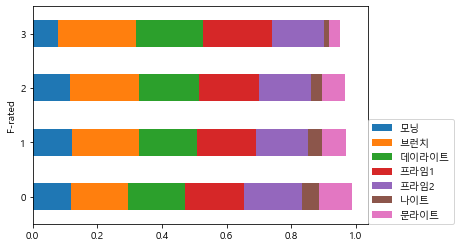

In [73]:
data.plot(kind='barh', stacked=True)
plt.legend(loc=[1, 0])

# 상영관

In [74]:
df = pd.read_csv('../01.Data_Collection/Theaters_merged_files/롯데시네마%20월드타워.csv')

In [75]:
df = df.fillna('00:00, -, 0원')

In [76]:
films = pd.read_csv('../01.Data_Collection/films_updated.csv')
ko_films = list(films['영화명'])

In [77]:
df.iloc[:, 2:-1] = df.iloc[:, 2:-1].astype(str).applymap(lambda x: x if x.split(',')[1].split('(')[0].strip() in ko_films else '-')

In [78]:
showtimes = [''.join(df.iloc[i, 2:-1]) for i in range(len(df))]

In [79]:
df['상영시간'] = showtimes

In [80]:
drop_idx = []
for i in range(len(df)):
    if df.loc[i, '상영시간'] == '-' * (len(df.columns)-4):
        drop_idx.append(i)
df = df.drop(df.index[drop_idx], axis=0).drop('상영시간', axis=1)

In [81]:
shows = pd.melt(df, id_vars=['상영일자', '좌석수', '상영관'], value_vars=list(df.columns[2:-1]))
shows= shows[shows['value']!='-'].drop('variable', axis=1)

In [82]:
shows['상영시간'] = shows['value'].apply(lambda x: x.split(',')[0].strip())
shows['제목'] = shows['value'].apply(lambda x: x.split(',')[1].split('(')[0].strip())

In [83]:
scale = pd.DataFrame(shows.groupby(['좌석수','상영시간'])['제목'].value_counts()).rename(columns={'제목':'횟수'})

In [84]:
scale = scale.reset_index()

In [85]:
scale['상영시간_h'] = scale['상영시간'].apply(lambda x: x.split(':')[0])
scale['좌석수*횟수'] = scale['좌석수'] * scale['횟수']

In [86]:
by_film = scale.groupby(['제목', '상영시간_h'])['좌석수*횟수'].sum().reset_index()

In [87]:
films_2 = by_film[by_film['제목'].isin(['비밀은 없다', '부산행'])]

In [89]:
films_2

,제목,상영시간_h,좌석수*횟수
3584,부산행,07,7329
3585,부산행,08,11477
3586,부산행,09,14962
3587,부산행,10,9462
3588,부산행,11,12787
3589,부산행,12,11499
3590,부산행,13,12689
3591,부산행,14,15543
3592,부산행,15,10616
3593,부산행,16,12359


# 그룹 별 파이

In [12]:
g1 = pd.read_csv('../01.Data_Collection/new_group1.csv')
g2 = pd.read_csv('../01.Data_Collection/new_group2.csv')
g3 = pd.read_csv('../01.Data_Collection/new_group3.csv')

In [13]:
g1 = g1.merge(films, how='left' , on='영화명')

In [14]:
g1.head()

,영화명,총배정좌석수,영화코드,개봉일,F-rated,장르,등급,영화구분,영화형태,대표국적,국적,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,감독1,감독1코드,감독1성별,감독2,감독2코드,감독2성별,감독3,감독3코드,감독3성별,감독4,감독4코드,감독4성별,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
0,죽여주는 여자,966000.000000,20161589,2016-10-06,1,드라마,청소년관람불가,독립/예술영화,장편,한국,한국,"한국영화아카데미,주식회사 뭉클픽쳐스",CGV아트하우스,8352,317,872397300.000000,119964,376215400,51740,이재용,이재용,10057210,남자,감독,죽여주는 여자|두근두근 내 인생|뒷담화: 감독이 미쳤어요|여배우들|다세포소녀|스캔들...,이재용,10057210.000000,남자,-,-,-,-,-,-,-,-,-,이재용,이재용,이재용,10057210,남자,감독,죽여주는 여자|두근두근 내 인생|뒷담화: 감독이 미쳤어요|여배우들|다세포소녀|스캔들...,"윤여정,김한나,전무송,윤계상,박성진,윤효진,예수정,서현우",윤여정,조성현,10054391,여자,배우,지푸라기라도 잡고 싶은 짐승들|찬실이는 복도 많지|그것만이 내 세상|죽여주는 여자|...
1,머니백,957144.000000,20165045,2018-04-12,0,"액션,드라마",15세이상관람가,일반영화,장편,한국,한국,(주)젠픽쳐스,(주)리틀빅픽쳐스,6878,472,411511600.000000,52618,105898500,12994,허준형,허준형,20238387,남자,감독,머니백,허준형,20238387.000000,남자,-,-,-,-,-,-,-,-,-,허준형,허준형,허준형,20238387,남자,감독,머니백,"김무열,박희순,이경영,전광렬,임원희,오정세,김민교,이익준,이동진,이소희,이신영,이윤...",김무열,NaN,10004099,남자,배우,악인전|도터(가제)|정직한 후보|인랑|기억의 밤|대립군|머니백|연평해전|개들의 전쟁...
2,"어쩌다, 결혼",936780.000000,20195791,2019-02-27,1,"멜로/로맨스,코미디",12세이상관람가,독립/예술영화,장편,한국,한국,(주)비에이엔터테인먼트,CGV아트하우스,6850,529,586584249.000000,76746,183109419,22596,"박호찬,박수진",박호찬,10029553,남자,조감독,"어쩌다, 결혼|허삼관|롤러코스터|퍼펙트 게임|베스트셀러|애자|아버지와 마리와 나|개...",박호찬,10029553.000000,남자,박수진,20313092.0,여자,-,-,-,-,-,-,"박호찬, 박수진, 한수현",박호찬,박호찬,10029553,남자,조감독,"어쩌다, 결혼|허삼관|롤러코스터|퍼펙트 게임|베스트셀러|애자|아버지와 마리와 나|개...","김동욱,고성희,황보라,김의성,임예진,염정아,한수현,이채은,김선영,차래형,김명준,손지...",김동욱,NaN,10003967,남자,배우,"어쩌다, 결혼|탐정: 리턴즈|신과함께-인과 연|신과함께-죄와 벌|쓰리 썸머 나잇|후..."
3,서울역,932894.000000,20148460,2016-08-17,0,애니메이션,15세이상관람가,독립/예술영화,장편,한국,한국,"주식회사 다다쇼,(주)화인컷",(주)넥스트엔터테인먼트월드(NEW),8055,440,1157200562.000000,146548,364877762,44396,연상호,연상호,10049814,남자,감독,반도|염력|카이: 거울 호수의 전설|서울역|부산행|졸업반|창백한 얼굴들|화산고래|사...,연상호,10049814.000000,남자,-,-,-,-,-,-,-,-,-,연상호,연상호,연상호,10049814,남자,감독,반도|염력|카이: 거울 호수의 전설|서울역|부산행|졸업반|창백한 얼굴들|화산고래|사...,"류승룡,심은경,이준,연상호,연상호,연상호,연상호,오윤석,이건우,이동하,이상희,이상희...",류승룡,박근형,10019065,남자,배우,입술은 안돼요(가제)|인생은 아름다워(가제)|극한직업|7년의 밤|염력|제5열|서울역...
4,"무현, 두 도시 이야기",918032.000000,20162545,2016-10-26,0,다큐멘터리,15세이상관람가,독립/예술영화,장편,한국,한국,"<무현, 두 도시 이야기> 제작위원회 ,엠앤씨에프",(주)모멘텀엔터테인먼트,9084,66,1517735100.000000,193578,521021200,63745,전인환,전인환,20153728,남자,감독,"시민 노무현|무현, 두 도시 이야기 : 파이널 컷|무현, 두 도시 이야기|품행제로|...",전인환,20153728.000000,남자,-,-,-,-,-,-,-,-,-,전인환,전인환,전인환,20153728,남자,감독,"시민 노무현|무현, 두 도시 이야기 : 파이널 컷|무현, 두 도시 이야기|품행제로|...","김원명,노무현",노무현,이동우,10008060,남자,배우,"시민 노무현|노무현과 바보들|무현, 두 도시 이야기 : 파이널 컷|노무현입니다|무현..."


In [23]:
g2 = g2.merge(films, how='left' , on='영화명')

In [24]:
g3 = g3.merge(films, how='left' , on='영화명')

In [22]:
g1.groupby('F-rated').size()
#df.groupby('city').size()

F-rated
0    194
1    141
2     37
3     44
dtype: int64

In [25]:
g2.groupby('F-rated').size()

F-rated
0    101
1     54
2     19
3      5
dtype: int64

In [26]:
g3.groupby('F-rated').size()

F-rated
0    46
1    13
2     7
dtype: int64